<a href="https://colab.research.google.com/github/Rnz5/Adam-vs-SGD-Comparison/blob/main/generador_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


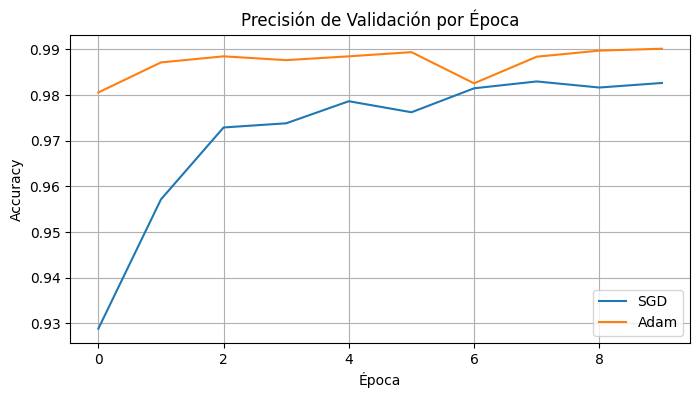

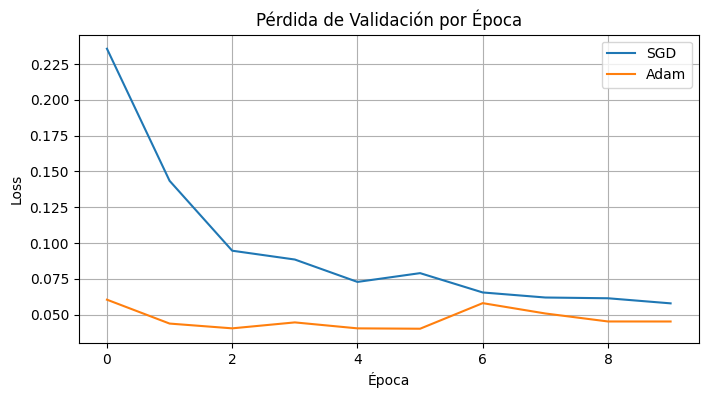

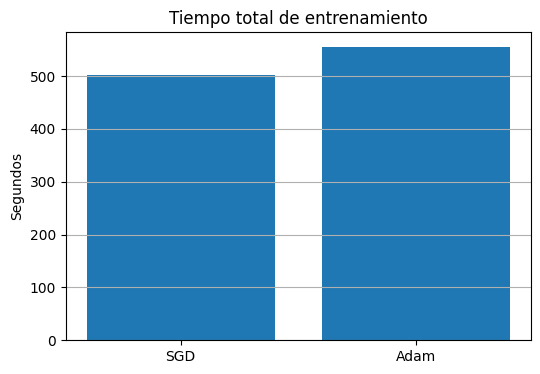

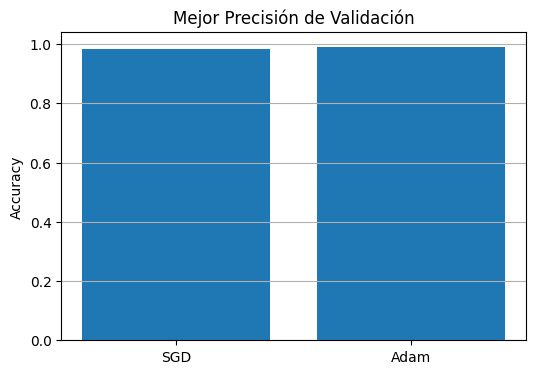

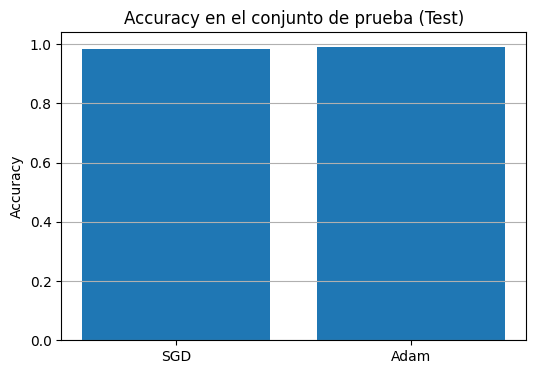

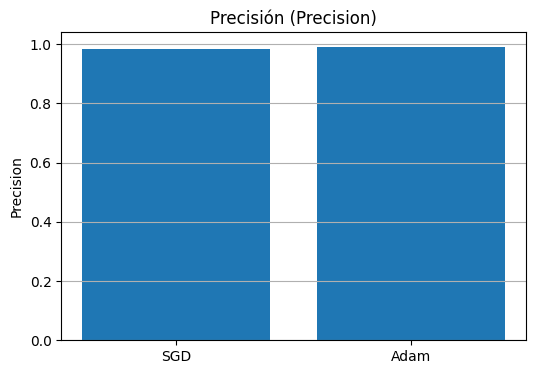

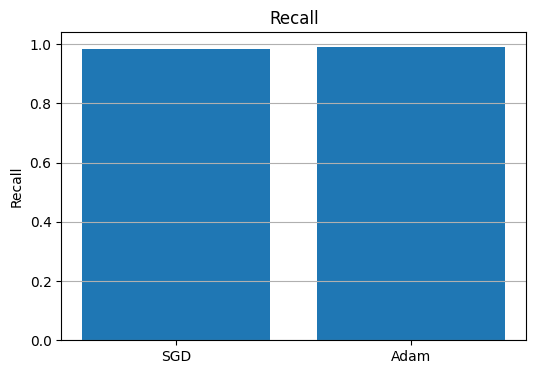

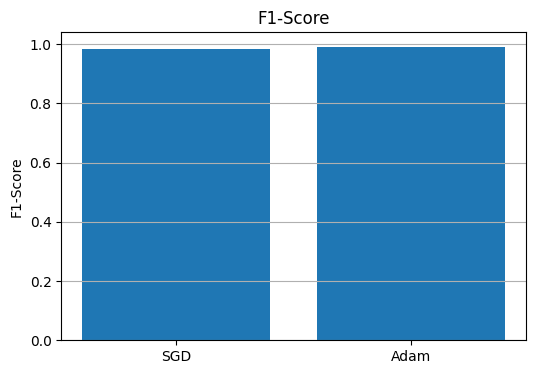

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def calcular_metricas(modelo, x_test, y_test):
    pred_probs = modelo.predict(x_test)
    pred_labels = np.argmax(pred_probs, axis=1)

    accuracy = accuracy_score(y_test, pred_labels)
    precision = precision_score(y_test, pred_labels, average='weighted')
    recall = recall_score(y_test, pred_labels, average='weighted')
    f1 = f1_score(y_test, pred_labels, average='weighted')

    return accuracy, precision, recall, f1


# Calcular y GUARDAR en datos_analisis
for nombre, resultado in resultados_comparacion.items():
    model = resultado['modelo']

    acc, prec, rec, f1 = calcular_metricas(model, x_test, y_test)

    datos_analisis[nombre]['accuracy_test'] = acc
    datos_analisis[nombre]['precision'] = prec
    datos_analisis[nombre]['recall'] = rec
    datos_analisis[nombre]['f1_score'] = f1




import matplotlib.pyplot as plt

# ============================================
# 1) GRÁFICA: PRECISIÓN DE VALIDACIÓN POR ÉPOCA
# ============================================
plt.figure(figsize=(8,4))

for nombre, datos in datos_analisis.items():
    plt.plot(datos['precision_validacion'], label=nombre)

plt.title("Precisión de Validación por Época")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# ============================================
# 2) GRÁFICA: PÉRDIDA DE VALIDACIÓN POR ÉPOCA
# ============================================
plt.figure(figsize=(8,4))

for nombre, datos in datos_analisis.items():
    plt.plot(datos['perdida_validacion'], label=nombre)

plt.title("Pérdida de Validación por Época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# ============================================
# 3) GRÁFICO DE BARRAS: TIEMPO DE ENTRENAMIENTO
# ============================================
nombres = list(datos_analisis.keys())
tiempos = [datos_analisis[n]['tiempo_total_segundos'] for n in nombres]

plt.figure(figsize=(6,4))
plt.bar(nombres, tiempos)
plt.title("Tiempo total de entrenamiento")
plt.ylabel("Segundos")
plt.grid(axis='y')
plt.show()


# ============================================
# 4) GRÁFICO DE BARRAS: MEJOR PRECISIÓN DE VALIDACIÓN
# ============================================
mejores = [max(datos_analisis[n]['precision_validacion']) for n in nombres]

plt.figure(figsize=(6,4))
plt.bar(nombres, mejores)
plt.title("Mejor Precisión de Validación")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()


#GRÁFICO DE BARRAS: MÉTRICAS (ACCURACY)

acc_test = [datos_analisis[n]['accuracy_test'] for n in nombres]

plt.figure(figsize=(6,4))
plt.bar(nombres, acc_test)
plt.title("Accuracy en el conjunto de prueba (Test)")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()



# GRÁFICO DE BARRAS: MÉTRICAS (PRECISIÓN)

precisiones = [datos_analisis[n]['precision'] for n in nombres]

plt.figure(figsize=(6,4))
plt.bar(nombres, precisiones)
plt.title("Precisión (Precision)")
plt.ylabel("Precision")
plt.grid(axis='y')
plt.show()



# GRÁFICO DE BARRAS: MÉTRICAS (RECALL)

recalls = [datos_analisis[n]['recall'] for n in nombres]

plt.figure(figsize=(6,4))
plt.bar(nombres, recalls)
plt.title("Recall")
plt.ylabel("Recall")
plt.grid(axis='y')
plt.show()



# GRÁFICO DE BARRAS: MÉTRICAS (F1-SCORE)

f1_scores = [datos_analisis[n]['f1_score'] for n in nombres]

plt.figure(figsize=(6,4))
plt.bar(nombres, f1_scores)
plt.title("F1-Score")
plt.ylabel("F1-Score")
plt.grid(axis='y')
plt.show()
